In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder



In [ ]:
# Read the dataset
df1 = pd.read_csv('/content/Egypt_Houses_Price (2).csv', sep=',')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [ ]:
# Convert 'Price', 'Bedrooms', 'Bathrooms', and 'Area' columns to numeric type
df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce')
df1['Bedrooms'] = pd.to_numeric(df1['Bedrooms'], errors='coerce')
df1['Bathrooms'] = pd.to_numeric(df1['Bathrooms'], errors='coerce')
df1['Area'] = pd.to_numeric(df1['Area'], errors='coerce')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            27361 non-null  object 
 1   Price           27322 non-null  float64
 2   Bedrooms        27121 non-null  float64
 3   Bathrooms       27153 non-null  float64
 4   Area            26854 non-null  float64
 5   Furnished       27361 non-null  object 
 6   Level           27361 non-null  object 
 7   Compound        27361 non-null  object 
 8   Payment_Option  27361 non-null  object 
 9   Delivery_Date   27361 non-null  object 
 10  Delivery_Term   27361 non-null  object 
 11  City            27361 non-null  object 
dtypes: float64(4), object(8)
memory usage: 2.5+ MB


In [ ]:
# Drop rows with missing values
df1 = df1.dropna(subset=['Price', 'Bedrooms', 'Bathrooms', 'Area'])

In [ ]:
# Convert categorical columns to numerical using LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['Type', 'Furnished', 'Level', 'Compound', 'Payment_Option', 'Delivery_Date', 'Delivery_Term', 'City']
for col in categorical_cols:
    df1[col] = label_encoder.fit_transform(df1[col])

In [ ]:
# Select the numerical columns for clustering
numerical_cols = ['Price', 'Bedrooms', 'Bathrooms', 'Area']
X = df1[numerical_cols]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

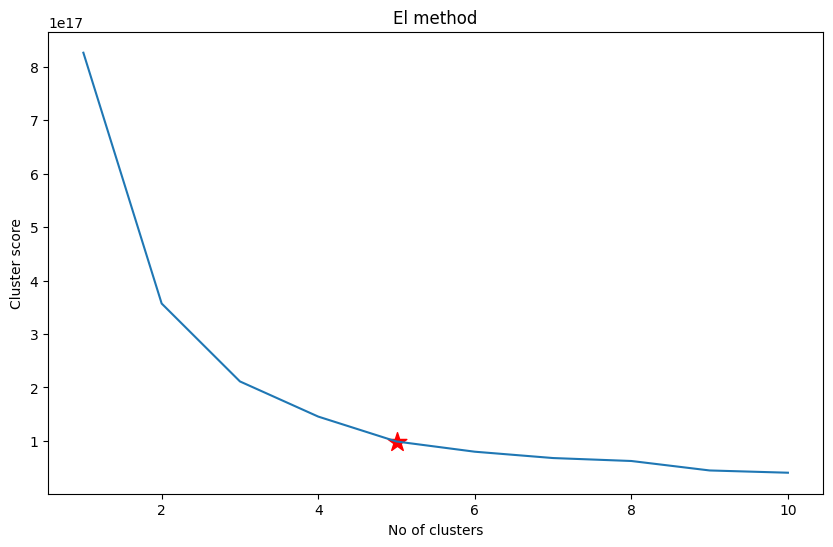

In [ ]:
clustering_score=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='random',random_state=42)
  kmeans.fit(X)
  clustering_score.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), clustering_score)
plt.scatter(5,clustering_score[4],s=200,c='red',marker='*')
plt.title('El method')
plt.xlabel('No of clusters')
plt.ylabel('Cluster score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Type      Price  Cluster
0     2  4000000.0        4
1     0  4000000.0        4
2     0  2250000.0        1
3     0  1900000.0        1
4     0  5800000.0        4


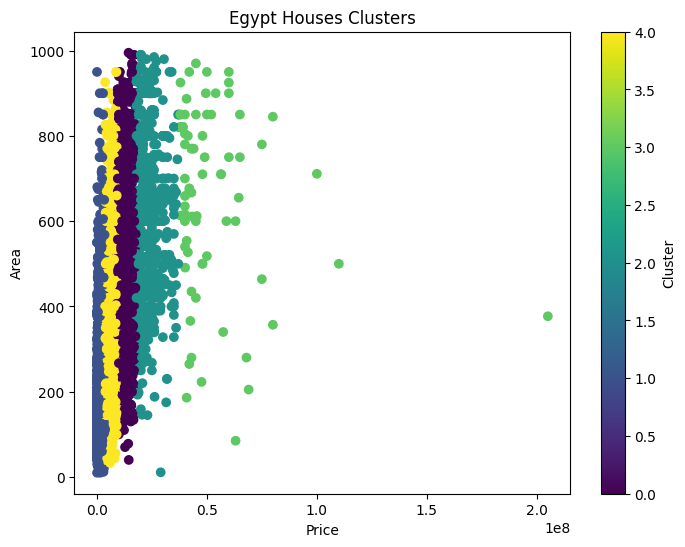

In [ ]:
# Apply K-means clustering
k = 5  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
df1['Cluster'] = cluster_labels

# Print the cluster assignments
print(df1[['Type', 'Price', 'Cluster']].head())

# Scatter plot of Price vs Area, colored by clusters
plt.figure(figsize=(8, 6))
plt.scatter(df1['Price'], df1['Area'], c=df1['Cluster'], cmap='viridis')
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Egypt Houses Clusters')
plt.colorbar(label='Cluster')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


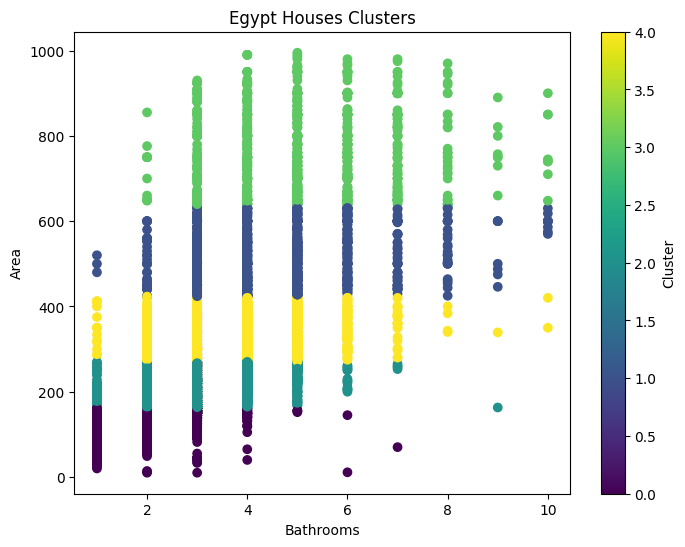

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Read the dataset
df1 = pd.read_csv('/content/Egypt_Houses_Price (2).csv', sep=',')

# Convert 'Price', 'Bedrooms', 'Bathrooms', and 'Area' columns to numeric type
df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce')
df1['Bedrooms'] = pd.to_numeric(df1['Bedrooms'], errors='coerce')
df1['Bathrooms'] = pd.to_numeric(df1['Bathrooms'], errors='coerce')
df1['Area'] = pd.to_numeric(df1['Area'], errors='coerce')

# Drop rows with missing values
df1 = df1.dropna(subset=['Price', 'Bedrooms', 'Bathrooms', 'Area'])

# Convert categorical columns to numerical using LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['Type', 'Furnished', 'Level', 'Compound', 'Payment_Option', 'Delivery_Date', 'Delivery_Term', 'City']
for col in categorical_cols:
    df1[col] = label_encoder.fit_transform(df1[col])

# Select the numerical columns for clustering
numerical_cols = ['Bathrooms', 'Area']
X = df1[numerical_cols]

# Apply K-means clustering
k = 5  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
df1['Cluster'] = cluster_labels

# Scatter plot of Bathrooms vs Area, colored by clusters
plt.figure(figsize=(8, 6))
plt.scatter(df1['Bathrooms'], df1['Area'], c=df1['Cluster'], cmap='viridis')
plt.xlabel('Bathrooms')
plt.ylabel('Area')
plt.title('Egypt Houses Clusters')
plt.colorbar(label='Cluster')
plt.show()


# Kmediod clustering

In [ ]:
!pip install scikit-learn-extra


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.2 MB/s eta 0:00:00


In [ ]:
pip install pyclustering


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395106 sha256=b74a8f24d555b328b5b8f892d07cf56cbad17922549e59f0ed6d6bda8861db7d
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


<ipython-input-38-371f6d38b8c3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = label_encoder.fit_transform(df1[col])
<ipython-input-38-371f6d38b8c3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = label_encoder.fit_transform(df1[col])
<ipython-input-38-371f6d38b8c3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

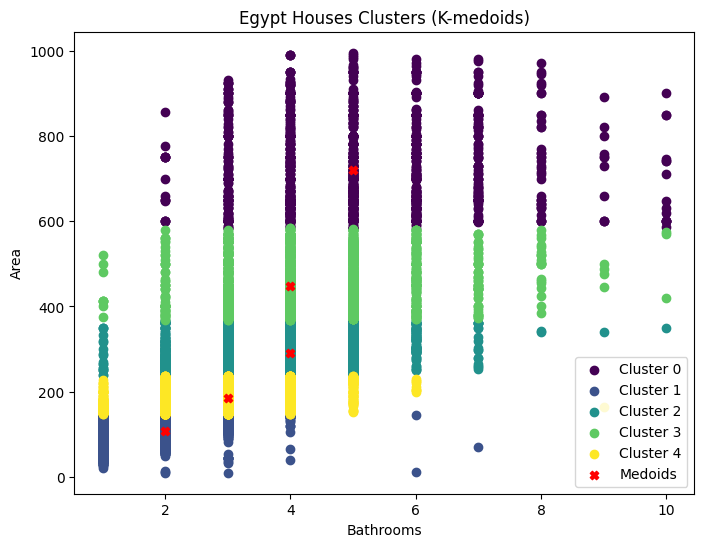

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from sklearn.preprocessing import LabelEncoder

# Read the dataset
df1 = pd.read_csv('/content/Egypt_Houses_Price (2).csv', sep=',')

# Convert 'Price', 'Bedrooms', 'Bathrooms', and 'Area' columns to numeric type
df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce')
df1['Bedrooms'] = pd.to_numeric(df1['Bedrooms'], errors='coerce')
df1['Bathrooms'] = pd.to_numeric(df1['Bathrooms'], errors='coerce')
df1['Area'] = pd.to_numeric(df1['Area'], errors='coerce')

# Drop rows with missing values
df1 = df1.dropna(subset=['Price', 'Bedrooms', 'Bathrooms', 'Area'])

# Convert categorical columns to numerical using LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['Type', 'Furnished', 'Level', 'Compound', 'Payment_Option', 'Delivery_Date', 'Delivery_Term', 'City']
for col in categorical_cols:
    df1[col] = label_encoder.fit_transform(df1[col])

# Select the numerical columns for clustering
numerical_cols = ['Bathrooms', 'Area']
X = df1[numerical_cols].values

# Apply K-medoids clustering
k = 5  # number of clusters
kmedoids_instance = kmedoids(X, initial_index_medoids=np.random.randint(len(X), size=k))
kmedoids_instance.process()

clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

# Create a colormap for visualizing clusters
colormap = plt.cm.get_cmap('viridis', k)

# Scatter plot of Bathrooms vs Area, colored by clusters
plt.figure(figsize=(8, 6))
for cluster_id, cluster in enumerate(clusters):
    plt.scatter(X[cluster, 0], X[cluster, 1], c=[colormap(cluster_id)], label=f'Cluster {cluster_id}')

plt.scatter(X[medoids, 0], X[medoids, 1], c='red', marker='X', label='Medoids')
plt.xlabel('Bathrooms')
plt.ylabel('Area')
plt.title('Egypt Houses Clusters (K-medoids)')
plt.legend()
plt.show()


<ipython-input-39-a906da2b543c>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', k)


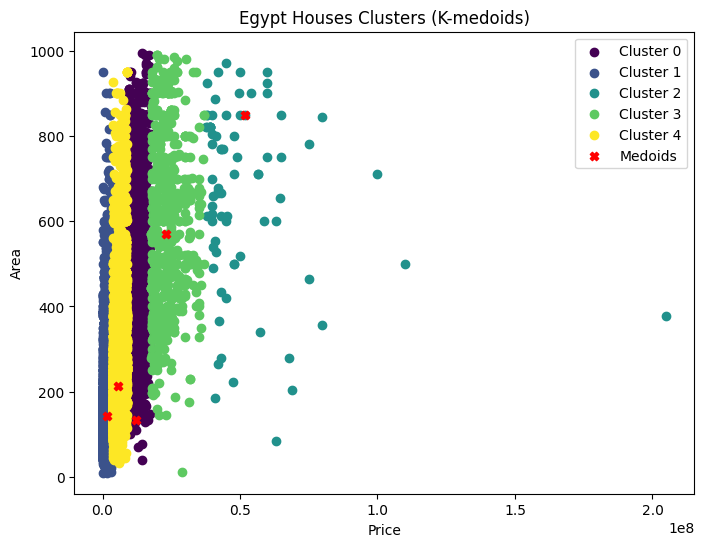

<ipython-input-40-a906da2b543c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = label_encoder.fit_transform(df1[col])
<ipython-input-40-a906da2b543c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = label_encoder.fit_transform(df1[col])
<ipython-input-40-a906da2b543c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from sklearn.preprocessing import LabelEncoder

# Read the dataset
df1 = pd.read_csv('/content/Egypt_Houses_Price (2).csv', sep=',')

# Convert 'Price', 'Bedrooms', 'Bathrooms', and 'Area' columns to numeric type
df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce')
df1['Bedrooms'] = pd.to_numeric(df1['Bedrooms'], errors='coerce')
df1['Bathrooms'] = pd.to_numeric(df1['Bathrooms'], errors='coerce')
df1['Area'] = pd.to_numeric(df1['Area'], errors='coerce')

# Drop rows with missing values
df1 = df1.dropna(subset=['Price', 'Bedrooms', 'Bathrooms', 'Area'])

# Convert categorical columns to numerical using LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['Type', 'Furnished', 'Level', 'Compound', 'Payment_Option', 'Delivery_Date', 'Delivery_Term', 'City']
for col in categorical_cols:
    df1[col] = label_encoder.fit_transform(df1[col])

# Select the numerical columns for clustering
numerical_cols = ['Price', 'Area']
X = df1[numerical_cols].values

# Apply K-medoids clustering
k = 5  # number of clusters
kmedoids_instance = kmedoids(X, initial_index_medoids=np.random.randint(len(X), size=k))
kmedoids_instance.process()

clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

# Create a colormap for visualizing clusters
colormap = plt.cm.get_cmap('viridis', k)

# Scatter plot of Bathrooms vs Area, colored by clusters
plt.figure(figsize=(8, 6))
for cluster_id, cluster in enumerate(clusters):
    plt.scatter(X[cluster, 0], X[cluster, 1], c=[colormap(cluster_id)], label=f'Cluster {cluster_id}')

plt.scatter(X[medoids, 0], X[medoids, 1], c='red', marker='X', label='Medoids')
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Egypt Houses Clusters (K-medoids)')
plt.legend()
plt.show()
